# Question 1 - Linear Regression

## Created by Aiden Seay - CS 599 (Deep Learning)

### Notebook Setup

In [1]:
"""
Import necessary packages
"""

# necessary imports
import tensorflow as tf
import matplotlib.pyplot as plt
from line_reg_utilities import *

"""
Complete checks to ensure status of TensorFlow
"""

# ensure eager execution
print("Eager execution:", tf.executing_eagerly())

# check if GPU is available on system
device_name = tf.config.list_physical_devices("GPU")

if(device_name):
    print(f"GPU Available: {device_name}")
else:
    print("CPU Only")

2025-09-30 11:43:47.728531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759257827.761606   15426 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759257827.777267   15426 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Eager execution: True
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Running Different Models

#### Testing Loss Functions

Running model on /CPU:0 with Seed: 123456
Weight: 1.6255512237548828, Bias: 1.3245270252227783, Time: 4.749221086502075, Final Loss: 1.3413835763931274
Running model on /CPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 4.808578729629517, Final Loss: 1.0431467294692993
Running model on /CPU:0 with Seed: 123456
Weight: 2.329362392425537, Bias: 1.692416787147522, Time: 6.084946632385254, Final Loss: 1.1119015216827393


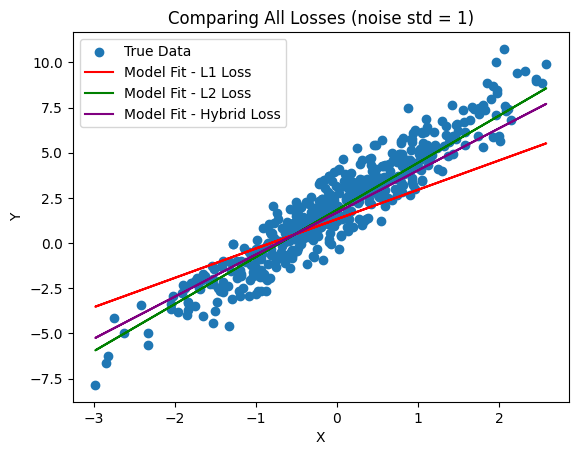

In [9]:
# run the model to test different loss functions

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

model_1 = run_model(l1_loss,
                    learning_rate = 0.001,
                    train_steps = 1000,
                    init_weight = 1.0,
                    init_bias = 1.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.0,
                    lr_noise = 0.0,
                    seed = 123456,
                    device = "/CPU:0")

model_2 = run_model(l2_loss,
                    learning_rate = 0.001,
                    train_steps = 1000,
                    init_weight = 1.0,
                    init_bias = 1.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.0,
                    lr_noise = 0.0,
                    seed = 123456,
                    device = "/CPU:0")

model_3 = run_model(hybrid_loss,
                    learning_rate = 0.001,
                    train_steps = 1000,
                    init_weight = 1.0,
                    init_bias = 1.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.0,
                    lr_noise = 0.0,
                    seed = 123456,
                    device = "/CPU:0")

# plot the true data
plt.scatter(model_1[6], model_1[5], label= "True Data")

# plot the L1 loss linear regression line
plt.plot(model_1[6], y_prediction(model_1[0], model_1[6], model_1[1]), 
         label = "Model Fit - L1 Loss", color = "red")

# plot the L2 loss linear regression line
plt.plot(model_2[6], y_prediction(model_2[0], model_2[6], model_2[1]), 
         label = "Model Fit - L2 Loss", color = "green")

# plot the Hybrid loss linear regression line
plt.plot(model_3[6], y_prediction(model_3[0], model_3[6], model_3[1]), 
         label = "Model Fit - Hybrid Loss", color = "purple")

plt.title(f"Comparing All Losses (noise std = 1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#### Testing Learning Rates

Running model with learning rate = 1e-05
Running model on /GPU:0 with Seed: 123456
Weight: 1.036657452583313, Bias: 1.0188813209533691, Time: 13.227916717529297, Final Loss: 5.167128086090088
Running model with learning rate = 0.0001
Running model on /GPU:0 with Seed: 123456
Weight: 1.3357957601547241, Bias: 1.1731637716293335, Time: 12.594728946685791, Final Loss: 3.906191110610962
Running model with learning rate = 0.001
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 12.849756002426147, Final Loss: 1.0431466102600098
Running model with learning rate = 0.01
Running model on /GPU:0 with Seed: 123456
Weight: 2.863496780395508, Bias: 1.9728015661239624, Time: 12.7555091381073, Final Loss: 0.9598389863967896
Running model with learning rate = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.863584280014038, Bias: 1.9728498458862305, Time: 12.554558753967285, Final Loss: 0.9598389267921448
Running model with learning rate = 1.0


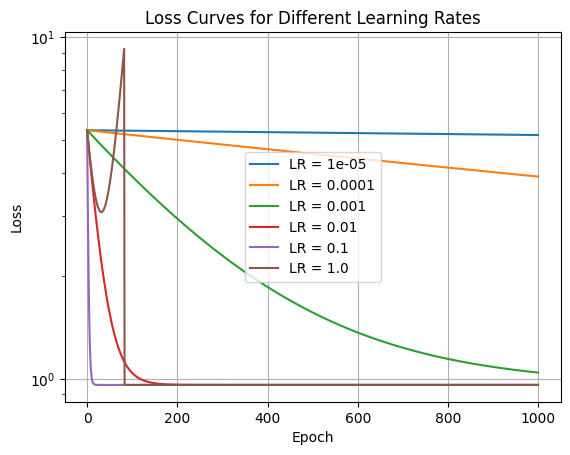

In [10]:
# run the model to test different learning rates

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the learning rates to test
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
results = {}

# iterate through different learning rates
for test_lr in learning_rates:
    print(f"Running model with learning rate = {test_lr}")
    results[test_lr] = run_model(
                                 l2_loss,
                                 learning_rate = test_lr,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for model_lr, model_output in results.items():
    plt.plot(model_output[7], label = f"LR = {model_lr}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

#### Testing Learning Duration

In [ ]:
# run the model to test different learning rates

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the learning durations to test
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]

results = {}

# iterate through different learning rates
for test_lr in learning_rates:
    print(f"Running model with learning rate = {test_lr}")
    results[test_lr] = run_model(
                                 l2_loss,
                                 learning_rate = test_lr,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for model_lr, model_output in results.items():
    plt.plot(model_output[7], label = f"LR = {model_lr}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()